<p style="font-size:12px;">
<h3><b>Introduction</b></h3> 
Our criteria for the project was most dog friendly neighborhood. We decided based on the dogs per square mile, dog friendly water features, and closeness to parks. We decided on this criteria based on the fact that dogs are awsome, and who doesn't like dogs.

<p style="font-size:12px;">
<h3><b>First Metric</b></h3> My metric was based on the number of dogs per square mile. I did some estimating in places so this is not exact information. For example my data set was organized by all the zip codes in Allegheny county, so I had to sort the neighborhoods into zip codes, which they don't cleanly fit into, then based the amount of dogs in each by the percent of square miles the neighborhood took up.

Imports pandas so we can use it's functions.

In [7]:
import pandas as pd

This block reads the csv file with the information for dogs, and the csv file I created with the neighborhoods and their zipcodes and size in sq. miles. It creates a dictionary of the zipcodes of all the dogs and a dictionary of the areas of each zipcode.

In [10]:
dogLis = pd.read_csv("dog.csv")
NH = pd.read_csv("neighborhoods.csv")
zipDogs = dogLis['OwnerZip'].value_counts()
zipArea = NH.groupby("Zip")["area"].sum()

This cell creates a list for the number of dogs in each neighborhood and the dogs per sq. mile in each neighborhood. It then creates a new column in the neighborhoods data set for each.

In [13]:
numDogs = []
dogPer = []
for row in NH.iterrows():
    prop = row[1]["area"]/zipArea[row[1]["Zip"]]
    dogs = prop * zipDogs[row[1]["Zip"]]
    numDogs.append(round(dogs))
    dogPer.append(round(dogs / row[1]["area"], 3))
NH["numDogs"] = numDogs
NH["dogDensity"] = dogPer

This cell creates the bar graph.

<Axes: title={'center': 'Top neighborhoods by dogs per sq. mile'}, ylabel='Neighborhoods'>

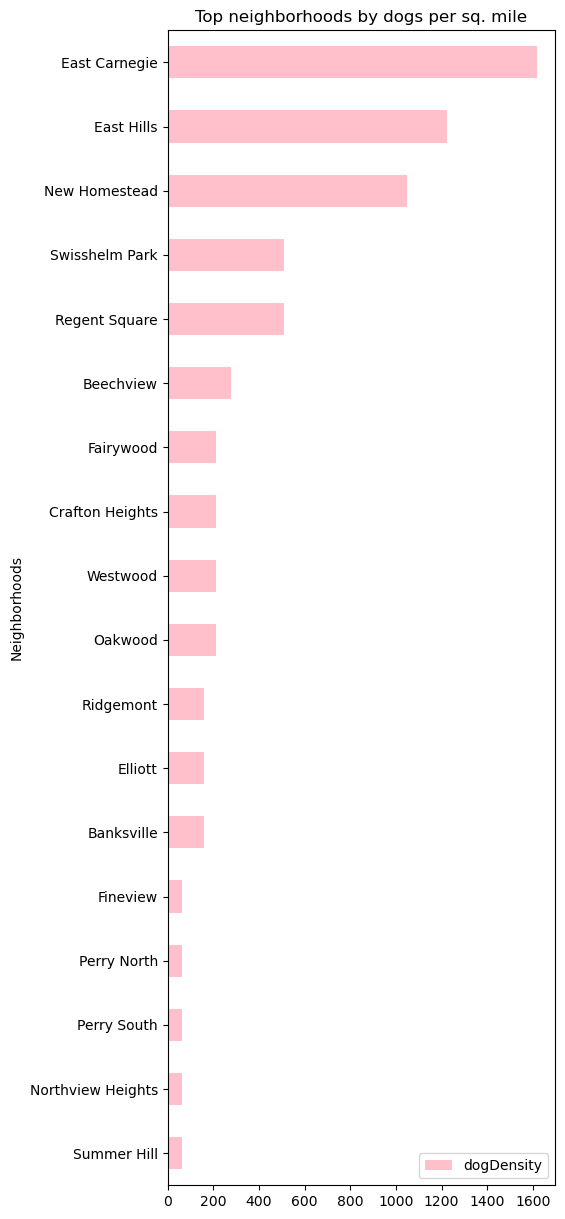

In [16]:
NHS = NH.sort_values(by='dogDensity')
NHSF = NHS[NHS['dogDensity']>50]
NHSF.plot("Neighborhoods", "dogDensity", kind = "barh", figsize = (5,15), title = "Top neighborhoods by dogs per sq. mile", color = "pink")

This cell prints out all neighborhoods from highest dog density to lowest.

In [78]:
pd.set_option('display.max_rows', 100)
NHSN = NH.sort_values(by='dogDensity', ascending = False)
display(NHSN)

,Neighborhoods,Zip,area,numDogs,dogDensity
24,East Carnegie,15106,0.432,698,1615.741
25,East Hills,15221,0.541,662,1223.660
49,New Homestead,15120,0.794,834,1050.378
58,Regent Square,15218,0.192,98,508.929
72,Swisshelm Park,15218,0.480,244,508.929
6,Beechview,15216,1.460,406,278.082
29,Fairywood,15205,0.969,205,211.849
75,Westwood,15205,0.692,147,211.849
21,Crafton Heights,15205,0.754,160,211.849
53,Oakwood,15205,0.252,53,211.849


<p style="font-size:12px;">
<h3><b>Conclusion</b></h3>
In conclusion, if you estimate the general amount of dogs per square mile, East Carnegie comes out on top with a density of about 1600 dogs per square mile. Second place goes to East hills with about 1200, and third to New Homestead with about 1000. These numbers are not the exact amount of dogs, but rather the average number of dogs in each square mile, which gives us an idea of how many hoseholds in each neighborhood has a dog in comparasin to eachother. My pick for best neighborhood therefore goes to East Carnegie.

<p style="font-size:12px;">
<h3><b>Second Metric</b></h3> My metric was water fountains. This is based on what I thought dogs would like best and what was most suitable for them. The total score is primarily calculated based on the number of parks in each neighborhood. However, a neighborhood with fewer parks can still achieve a higher total score if those parks are more dog-friendly. I considered this viable because a neighborhood with many parks could be considered more dog-friendly overall even if not all parks are equally suitable.
</p>

In [29]:
import pandas as pd

water = pd.read_csv("Water.tsv", sep="\t")

neighborhoods = water['neighborhood'].drop_duplicates()

assigns values to different types of features

In [32]:
feature_values = {
    "Spray": 3,
    "Drinking Fountain": 2,
    "Decorative": 1
}
water['feature_value'] = water['feature_type'].map(feature_values)

assigns values to different control types

In [35]:
control_values = {
    "Continuous": 2,
    "On/Off": 1
}
water['control_value'] = water['control_type'].map(control_values).fillna(0).astype(int)

organizes the different scores

In [38]:
neighborhood_scores = water.groupby('neighborhood')[['feature_value', 'control_value']].sum()
neighborhood_scores['total_score'] = neighborhood_scores['feature_value'] + neighborhood_scores['control_value']

sorts values highest to lowest

In [41]:
sorted_neighborhoods = neighborhood_scores.sort_values(by='total_score', ascending=False)

pd.set_option('display.max_rows', None)
print(sorted_neighborhoods)

                           feature_value  control_value  total_score
neighborhood                                                        
Squirrel Hill South                   26             18           44
Highland Park                         23             15           38
Bloomfield                            17             10           27
Brookline                             17             10           27
Allegheny Center                      15             11           26
Terrace Village                       17              9           26
Perry North                           14              9           23
Spring Hill-City View                 14              9           23
Carrick                               12              8           20
Brighton Heights                      12              8           20
South Side Flats                      12              7           19
Mount Washington                      12              7           19
Troy Hill                         

Creates plot.

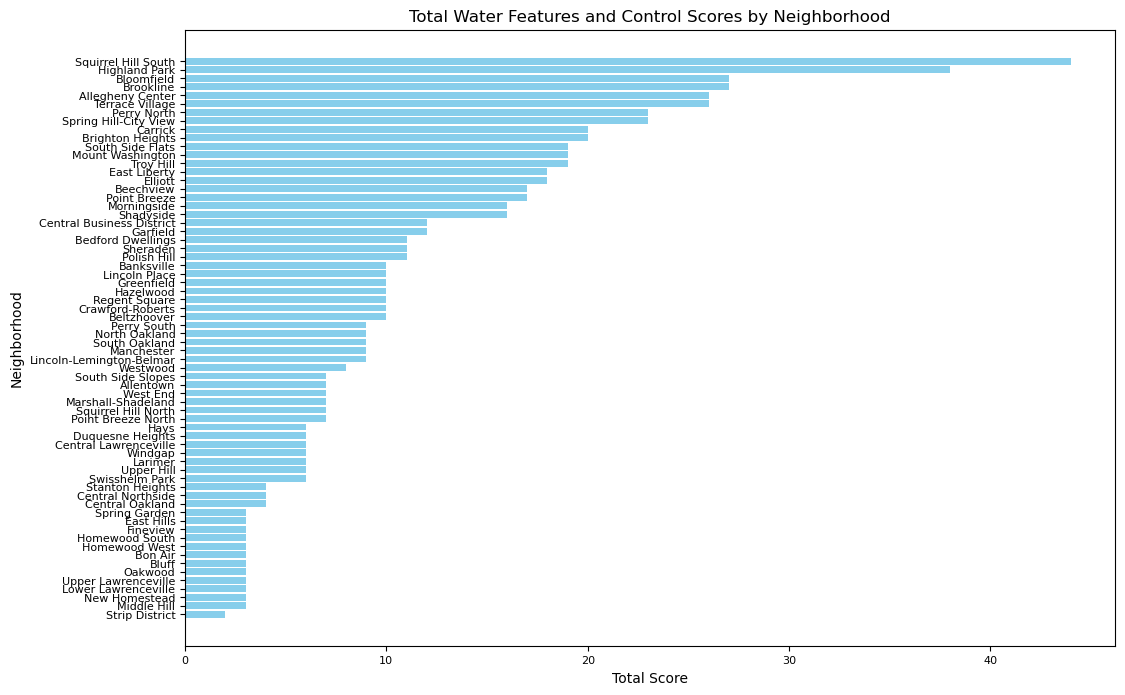

In [44]:
import matplotlib.pyplot as plt

# total score
plt.figure(figsize=(12, 8))
plt.barh(sorted_neighborhoods.index, sorted_neighborhoods['total_score'], color='skyblue')

# labels
plt.xlabel('Total Score', fontsize=10)  # Smaller font size for x-axis label
plt.ylabel('Neighborhood', fontsize=10)  # Smaller font size for y-axis label
plt.title('Total Water Features and Control Scores by Neighborhood', fontsize=12)  # Smaller font size for title

# font size
plt.tick_params(axis='both', labelsize=8)


# highest score up top
plt.gca().invert_yaxis()

plt.show()


<p style="font-size:12px;">
<h3><b>Conclusion</b></h3>
My metric was water fountains. This is based on what I thought dogs would like best, and what was most suitable for them. The total score is primarily calculated based on the number of parks in each neighborhood. However, a neighborhood with fewer parks can still achieve a higher total score if those parks are more dog-friendly. I considered this viable because a neighborhood with many parks could be considered more dog-friendly overall, even if not all parks are equally suitable.

<p style="font-size:12px;">
<h3><b>Third Metric</b></h3>
My metric was based on the amount of parks within a neighborhood per square mile. Utilizing the csv of neighborhoods, I iterated through each neighborhood and found the amount of parks that reside within the neighborhood. Then, my score is determined by simply dividing the number of parks by the pre-determined neighborhood size.

Imports, and dataset reads. the parks dataset included non-park lots and spaces, so we filter for only those that are labeled 'Park'.

In [54]:
import pandas as pd 

parks0 = pd.read_csv('parks_0.tsv', sep = '\t')
neighborhoods = pd.read_csv('neighborhoods.csv')

#Dataset includes non-park lots and spaces
parks0 = parks0.loc[parks0['type'] == 'Park']

Iterates through each neighborhood and determines its score.

In [59]:
pkspersqm = []
for n in neighborhoods.iterrows():
    name = n[1]['Neighborhoods']
    nparks = parks0.loc[parks0['neighborhood'] == name]
    
    metric = len(nparks) / float(n[1]['area'])
    pkspersqm.append(metric)

neighborhoods['parks_per_square_mile'] = pkspersqm

Creates bar graphs for all neighborhoods with a metric of greater than 6 (average) parks per sq. mile.

<Axes: title={'center': 'Top neighborhoods by parks per square mile'}, ylabel='Neighborhoods'>

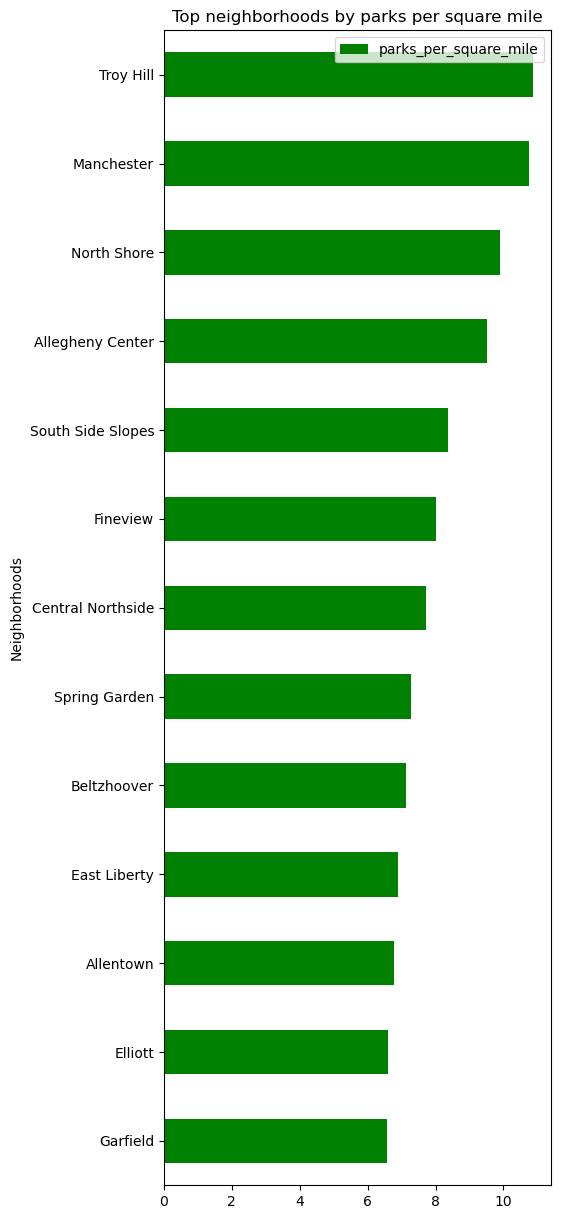

In [64]:
disp = neighborhoods.sort_values(by = 'parks_per_square_mile')
dispB = disp[disp['parks_per_square_mile'] > 6]
dispB.plot("Neighborhoods", "parks_per_square_mile", kind = "barh", figsize = (5,15), title = "Top neighborhoods by parks per square mile", color = "green")

Prints out all neighborhoods in descending park 'density'.

In [69]:
pd.set_option('display.max_rows', 80)
dispG = disp.sort_values(by = 'parks_per_square_mile', ascending = False)
display(dispG)

,Neighborhoods,Zip,area,parks_per_square_mile
73,Troy Hill,15212,0.460,10.869565
43,Manchester,15233,0.279,10.752688
51,North Shore,15212,0.303,9.900990
0,Allegheny Center,15212,0.210,9.523810
65,South Side Slopes,15203,0.716,8.379888
30,Fineview,15214,0.250,8.000000
17,Central Northside,15212,0.259,7.722008
66,Spring Garden,15212,0.275,7.272727
7,Beltzhoover,15210,0.421,7.125891
26,East Liberty,15206,0.581,6.884682


<p style="font-size:12px;">
<h3><b>Conclusion</b></h3>
Based on the metric of parks per square mile, neighborhoods Troy Hill and Manchester have the greatest number of parks relative to their size, and should be dog friendly neighborhoods.

<p style="font-size:12px;">
<h3><b>Final Conclusion</b></h3>
When taking into account all three metrics Elliot is the most dog friendly neighborhood, and therefore best pittsburgh neighborhood. This is because 